# Описание и примеры использования библиотеки NLTK

Библиотека NLTK была создана в 2001 году как часть курса компьютерной
лингвистики факультета компьютерных и информационных наук Пенсильванского
университета, в дальнейшем библиотека разрабатывалась сообществом и применялась
во многих исследованиях и университетских курсах [1].

Список основных модулей NLTK:

<table>
    <thead>
    <tr>
        <th class="head">Задача обработки языка</th>
        <th class="head">Модули NLTK</th>
        <th class="head">Функциональность</th>
    </tr>
    </thead>
    <tbody>
    <tr>
        <td>Доступ к корпусам</td>
        <td>corpus</td>
        <td>Стандартизированные интерфейсы корпусов и лексиконов</td>
    </tr>
    <tr>
        <td>Обработка строк</td>
        <td>tokenize, stem</td>
        <td>токенизаторы, токенизаторы предложений, стеммеры</td>
    </tr>
    <tr>
        <td>Обнаружение словосочетаний</td>
        <td>collocations</td>
        <td>t-тест, χ<sup>2</sup>, точечная взаимная информация</td>
    </tr>
    <tr>
        <td>Разметка частей речи</td>
        <td>tag</td>
        <td>n-gram, backoff, Brill, HMM, TnT</td>
    </tr>
    <tr>
        <td>Машинное обучение</td>
        <td>classify, cluster, tbl</td>
        <td>decision tree, maximum entropy, naive Bayes, EM, k-means</td>
    </tr>
    <tr>
        <td>Разбиение предложений</td>
        <td>chunk</td>
        <td>Регулярные выражения, n-граммы, именованные сущности</td>
    </tr>
    <tr>
        <td>Парсинг</td>
        <td>parse, ccg</td>
        <td>chart, feature-based, unification, probabilistic, dependency</td>
    </tr>
    <tr>
        <td>Семантическая интерпретация</td>
        <td>sem, inference</td>
        <td>лямбда-исчисление, логика первого порядка, проверка моделей</td>
    </tr>
    <tr>
        <td>Показатели</td>
        <td>metrics</td>
        <td>точнгоссть, recall, коэффициенты согласия</td>
    </tr>
    <tr>
        <td>Вероятность и оценка</td>
        <td>probability</td>
        <td>распределения частот, сглаженные распределения вероятностей</td>
    </tr>
    <tr>
        <td>Приложения</td>
        <td>app, chat</td>
        <td>graphical concordancer, parsers, WordNet browser, chatbots</td>
    </tr>
    <tr>
        <td>Linguistic fieldwork</td>
        <td>toolbox</td>
        <td>манипулирование данными в формате SIL Toolbox</td>
    </tr>
    </tbody>
</table>

## Обработка языка и Python

Для подключения NLTK к python-скрипту необходимо выполнить

In [2]:
import abc
import re
from math import pi
import nltk
import io
import typing
import sys
import nltk.corpus.util
import nltk.collections


def get_print_as_str(f: typing.Callable) -> str:
    result = io.StringIO
    stdout = sys.stdout
    sys.stdout = result
    f()
    sys.stdout = stdout
    return result.getvalue()

Затем загрузим необходимые данные с помощью

In [19]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

В открывшемся окне можно выбрать необходимые корпусы и модели или коллекцию
для загрузки.

Для дальнейших примеров потребуется коллекция `book`.

Загрузим набор текстов и предложений из пакета `book`:

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


В результате в память интерпретатора загружаются переменные `sent1` – `sent9`
типа `list[str]` — предложения в виде неразмеченных списков токенов, тексты
`text1` –  `text9` и корпусы
 `genesis, gutenberg, inaugutal, nps_chat,treebank, webtext, wordnet`.

### Поиск текста

Для того, чтобы получить все вхождения конкретного слова в текст без учёта
регистра с некоторыми контекстом, можно использовать метод `concordance`,
например:

In [21]:
text1.concordance("member")

Displaying 9 of 9 matches:
rch ?" " Why ," said I , " he ' s a member of the first Congregational Church 
ueequeg . " How long hath he been a member ?" he then said , turning to me ; "
ad , " is this Philistine a regular member of Deacon Deuteronomy ' s meeting ?
w is , that Queequeg here is a born member of the First Congregational Church 
han a blow from a cane . The living member -- that makes the living insult , m
, Jonah , and Vishnoo ! there ' s a member - roll for you ! What club but the 
eed twenty feet across . The entire member seems a dense webbed bed of welded 
is comrades quit him . But strike a member of the harem school , and her compa
 ' s naturalists , we find a Danish member of the Academy of Sciences setting 


In [22]:
text3.concordance("lived")

Displaying 25 of 38 matches:
ay when they were created . And Adam lived an hundred and thirty years , and be
ughters : And all the days that Adam lived were nine hundred and thirty yea and
nd thirty yea and he died . And Seth lived an hundred and five years , and bega
ve years , and begat Enos : And Seth lived after he begat Enos eight hundred an
welve years : and he died . And Enos lived ninety years , and begat Cainan : An
 years , and begat Cainan : And Enos lived after he begat Cainan eight hundred 
ive years : and he died . And Cainan lived seventy years and begat Mahalaleel :
rs and begat Mahalaleel : And Cainan lived after he begat Mahalaleel eight hund
years : and he died . And Mahalaleel lived sixty and five years , and begat Jar
s , and begat Jared : And Mahalaleel lived after he begat Jared eight hundred a
and five yea and he died . And Jared lived an hundred sixty and two years , and
o years , and he begat Eno And Jared lived after he begat Enoch eight hundred y
 and two ye

Для получения списка слов, используемых в том же контексте, что и исследуемое,
используется метод `similar`:

In [23]:
print("words in text1 similar to 'member'")
text1.similar("member")
print("\nwords in text2 similar to 'lived'")
text2.similar("lived")

words in text1 similar to 'member'
king chance ship little sudden flash feather school while whale word
roll devil view dragon sea thing boat land vessel

words in text2 similar to 'lived'
was said had been came were is found called happened added might
promised arrived done expected began engaged seemed continued


Для получения контекста похожих слов можно использовать метод `common_contexts`:

In [24]:
print("Common contexts for the words 'king' and 'member' in text1:")
text1.common_contexts(['king', 'member'])
print("\nCommon contexts for the words 'lived' and 'continued' in text1:")
text2.common_contexts(['lived', 'continued'])

Common contexts for the words 'king' and 'member' in text1:
a_of a_he

Common contexts for the words 'lived' and 'continued' in text1:
she_but she_as


Также возможно построить распределение позиций слов в тексте:

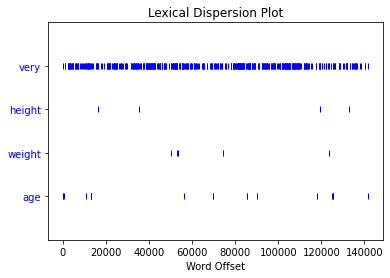

In [25]:
text2.dispersion_plot(["very", "height", "weight", "age"])

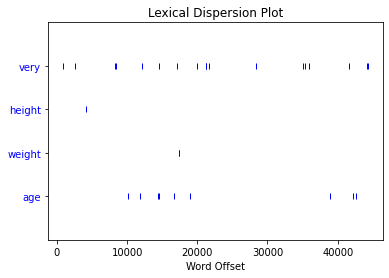

In [26]:
text3.dispersion_plot(["very", "height", "weight", "age"])

### Подсчёт словаря

Как можно заметить из предыдущих примеров, разные тексты отличаются по
словарному запасу.

Для начала посмотрим количество слов и знаков препинания в тексте:

In [27]:
print(len(text2))

141576


Сортированный список токенов, встречающихся в тексте, можно получить с помощью
конструкции

In [28]:
sorted_words_text2_raw = sorted(set(text2))
sorted_words_text2_raw

['!',
 '!"',
 '!"--',
 "!'",
 '!\'"',
 '!--',
 '!--"',
 '"',
 '"\'',
 '"--',
 '&',
 "'",
 "',",
 "'--",
 '(',
 ')',
 '),',
 ')--',
 '***',
 ',',
 ',"',
 ',"--',
 ",'",
 ',)',
 ',-',
 ',--',
 ',--"',
 '-',
 '--',
 '--"',
 "--'",
 '--(',
 '--,',
 '-?',
 '-?"',
 '.',
 '."',
 '."--',
 ".'",
 '.\'"',
 ".'--",
 '.)',
 '.)--',
 '.--',
 '.--"',
 '...',
 '..."',
 '.]',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '1811',
 '19',
 '2',
 '20',
 '200',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '6',
 '7',
 '7000L',
 '8',
 '9',
 ':',
 ':--',
 ':--"',
 ';',
 ';"',
 ';"--',
 ";'",
 ';--',
 ';--"',
 '>',
 '?',
 '?"',
 '?"--',
 "?'",
 '?)',
 '?--',
 '?--"',
 'A',
 'ALL',
 'ALMOST',
 'ALWAYS',
 'AM',
 'ANY',
 'ARE',
 'Abbeyland',
 'About',
 'Absence',
 'Abundance',
 'Add',
 'Affecting',
 'After',


Для очистки от чисел, знаков препинания и одних и тех же слов в разном регистре
можно использовать конструкцию

In [29]:
sorted_words_text2 = sorted(set(i.lower() for i in sorted_words_text2_raw if i[0].isalpha()))
sorted_words_text2

['a',
 'abandoned',
 'abatement',
 'abbeyland',
 'abhor',
 'abhorred',
 'abhorrence',
 'abilities',
 'ability',
 'able',
 'ablest',
 'abode',
 'abominably',
 'abounded',
 'about',
 'above',
 'abridge',
 'abridgement',
 'abroad',
 'abruptly',
 'abruptness',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'abstracted',
 'abstraction',
 'abstruse',
 'absurd',
 'absurdity',
 'abundance',
 'abundantly',
 'abuse',
 'abused',
 'abuses',
 'acacia',
 'accelerate',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'acceptably',
 'acceptance',
 'accepted',
 'accepting',
 'accident',
 'accidental',
 'accidentally',
 'accidently',
 'accommodate',
 'accommodating',
 'accommodation',
 'accommodations',
 'accompanied',
 'accompany',
 'accomplished',
 'accomplishment',
 'accordant',
 'according',
 'accordingly',
 'accosted',
 'account',
 'accounted',
 'accounts',
 'accrue',
 'accurately',
 'accusation',
 'accuse',
 'accustom',
 'accustomary',
 'aches',
 'aching',
 'acknowledge',
 'acknowledged',
 '

Отношение количества уникальных слов к количеству уникальных токенов

In [30]:
len(sorted_words_text2) / len(sorted_words_text2_raw)

0.919508268696034

Один из показателей лексического богатства текста — отношение количества уникальных токенов к общему количеству токенов в тексте:

In [31]:
len(sorted_words_text2_raw) / len(text2)

0.04826383002768831

Возможен подсчёт количества вхождений слова в текст и его относительной частоты в тексте:

In [32]:
word = "and"

print(f"Количество вхождений слова \"{word}\" в text2: {text2.count(word)}")
print(f"Относительная частота слова \"{word}\" в text2: {text2.count(word) / len(text2):.3}")

Количество вхождений слова "and" в text2: 3350
Относительная частота слова "and" в text2: 0.0237


### Простая статистика в тексте

#### Распределение частот

Возможно найти распределение слов в тексте по частоте с помощью класса
`nltk.FreqDist`:

In [33]:
fdist = nltk.FreqDist(text2)
fdist.most_common(20)

[(',', 9397),
 ('to', 4063),
 ('.', 3975),
 ('the', 3861),
 ('of', 3565),
 ('and', 3350),
 ('her', 2436),
 ('a', 2043),
 ('I', 2004),
 ('in', 1904),
 ('was', 1846),
 ('it', 1568),
 ('"', 1506),
 (';', 1419),
 ('she', 1333),
 ('be', 1305),
 ('that', 1297),
 ('for', 1234),
 ('not', 1212),
 ('as', 1179)]

Плучим количество вхождений конкретного слова в текст:

In [34]:
fdist["about"]

135

график распределения слов по частоте

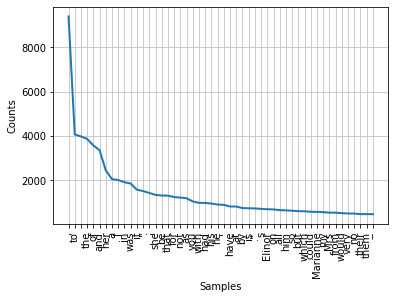

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
fdist.plot(50)

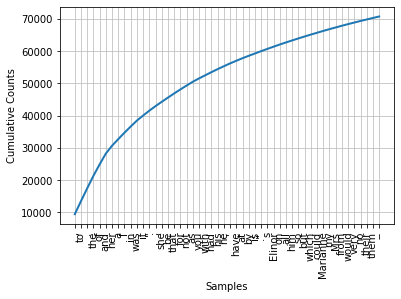

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [36]:
fdist.plot(50, cumulative=True)

По графику видно, что 50 самых частых слов встречаются суммарно около 70000
раз при общем количестве слов в тексте 141576

Получим список слов, которые встретились в тексте только один раз:

In [37]:
fdist.hapaxes()

['Sense',
 'Sensibility',
 'Jane',
 'Austen',
 '1811',
 ']',
 'generations',
 'inheritor',
 'bequeath',
 'Gentleman',
 'relish',
 'devolved',
 'inheriting',
 'moiety',
 'bequest',
 'sale',
 'articulation',
 'economically',
 'tardy',
 'survived',
 'including',
 'legacies',
 'urgency',
 'prudently',
 'caricature',
 'warmed',
 'Three',
 'successively',
 'funeral',
 'dispute',
 'decease',
 'indelicacy',
 'keen',
 'whomsoever',
 'immoveable',
 'acutely',
 'qualified',
 'counsellor',
 'joys',
 'afflicted',
 'strive',
 'humored',
 'imbibed',
 'romance',
 'thirteen',
 '2',
 'installed',
 'degraded',
 'seasons',
 'alloy',
 'impoverishing',
 'headed',
 'stipulate',
 'LET',
 'diminished',
 'REALLY',
 'strikes',
 'Fifteen',
 'healthy',
 'clogged',
 'superannuated',
 'amazing',
 'restriction',
 'drains',
 'bind',
 'inconvenient',
 'enlarge',
 'sixpence',
 'discharging',
 'presents',
 'fish',
 'Altogether',
 'cheap',
 'fulfil',
 'removes',
 'stock',
 'belongs',
 'indecorous',
 'neighbourly',
 '3',
 

Также возможно получить слова текста, удовлетворяющие сложным условия, например
список слов длины больше 10, которые встретились в тексте больше 15 раз:

In [38]:
frequent_long_words = [w
                       for w in sorted_words_text2
                       if len(w) > 10 and fdist[w] > 15]
frequent_long_words

['acquaintance',
 'affectionate',
 'astonishment',
 'cheerfulness',
 'circumstance',
 'circumstances',
 'comfortable',
 'consequence',
 'conversation',
 'countenance',
 'difficulties',
 'disappointed',
 'disappointment',
 'disposition',
 'exceedingly',
 'expectation',
 'immediately',
 'inclination',
 'indifference',
 'indifferent',
 'information',
 'intelligence',
 'observation',
 'opportunity',
 'particularly',
 'particulars',
 'recollection',
 'satisfaction',
 'understanding',
 'unfortunate']

#### Словосочетания и биграмы

Чтобы получить  биграмы в тексте существует функция `nltk.bigrams`:

In [39]:
list(nltk.bigrams(sent7))

[('Pierre', 'Vinken'),
 ('Vinken', ','),
 (',', '61'),
 ('61', 'years'),
 ('years', 'old'),
 ('old', ','),
 (',', 'will'),
 ('will', 'join'),
 ('join', 'the'),
 ('the', 'board'),
 ('board', 'as'),
 ('as', 'a'),
 ('a', 'nonexecutive'),
 ('nonexecutive', 'director'),
 ('director', 'Nov.'),
 ('Nov.', '29'),
 ('29', '.')]

Также возможно выделить словосочетания из текста:

In [40]:
text2.collocations()

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


In [41]:
text7.collocations()

million *U*; New York; billion *U*; Wall Street; program trading; Mrs.
Yeargin; vice president; Stock Exchange; Big Board; Georgia Gulf;
chief executive; Dow Jones; S&P 500; says *T*-1; York Stock; last
year; Sea Containers; South Korea; American Express; San Francisco


`FreqDist` может быть создан для разных объектов, например для списка чисел:

In [42]:
fdist_pi = FreqDist(int(i) for i in str(pi)[2:])
fdist_pi.most_common()

[(5, 3), (9, 3), (1, 2), (3, 2), (4, 1), (2, 1), (6, 1), (8, 1), (7, 1)]

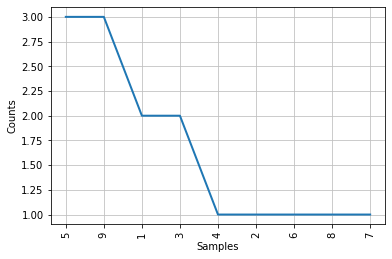

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [43]:
fdist_pi.plot()

Возможно обновить частоту вручную:

In [44]:
print(fdist_pi[2])
fdist_pi[2] += 1
print(fdist_pi[2])

1
2


Соединить два распределения:

In [45]:
fdist_pi |= fdist

получить относительную частоту токена:

In [46]:
fdist.freq('a')

0.01443041193422614

и так далее.

## Доступ к корпусам и лексическим ресурсам

Фактически корпус — большой массив текста,  возможно с дополнительной информацией.

В состав NLTK включены несколько корпусов, основные из них:

1. Тэггер русского языка https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/taggers/averaged_perceptron_tagger_ru.zip
1. `nltk.corpus.gutenberg` — избранные тексты проекта Гутенберг
1. `nltk.corpus.webtext` — сообщения с интернет-порталов
1. `nltk.corpus.nps_chat` — ананимизированные сообщения личной переписки, собранные во время исследования в Naval Postgraduate School
1. Brown - корпус с текстами и информацией об их жанре
1. `nltk.corpus.reuters` — коллекция новостных сообщений, сгруппированная пго темам и разделённая на обучающую и тестирующую выборки
1. `nltk.corpus.inaugural` — инаугурационные речи президентов США
1. `nltk.corpus.wordnet` — семантический словарь английского языка
1. `nltk.corpus.udhr` — корпус с текстом декларации прав человека на примерно 300 языках.

In [47]:
nltk.corpus.udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

Полный список корпусов

In [48]:
dir(nltk.corpus)

['AlignedCorpusReader',
 'AlpinoCorpusReader',
 'BNCCorpusReader',
 'BracketParseCorpusReader',
 'CHILDESCorpusReader',
 'CMUDictCorpusReader',
 'CategorizedBracketParseCorpusReader',
 'CategorizedCorpusReader',
 'CategorizedPlaintextCorpusReader',
 'CategorizedSentencesCorpusReader',
 'CategorizedTaggedCorpusReader',
 'ChasenCorpusReader',
 'ChunkedCorpusReader',
 'ComparativeSentencesCorpusReader',
 'ConllChunkCorpusReader',
 'ConllCorpusReader',
 'CorpusReader',
 'CrubadanCorpusReader',
 'DependencyCorpusReader',
 'EuroparlCorpusReader',
 'FramenetCorpusReader',
 'IEERCorpusReader',
 'IPIPANCorpusReader',
 'IndianCorpusReader',
 'KNBCorpusReader',
 'LazyCorpusLoader',
 'LinThesaurusCorpusReader',
 'MTECorpusReader',
 'MWAPPDBCorpusReader',
 'MacMorphoCorpusReader',
 'NKJPCorpusReader',
 'NPSChatCorpusReader',
 'NombankCorpusReader',
 'NonbreakingPrefixesCorpusReader',
 'OpinionLexiconCorpusReader',
 'PPAttachmentCorpusReader',
 'PanLexLiteCorpusReader',
 'PanlexSwadeshCorpusReader',

**Примеры работы с копусами**

Используем корпус `udhr` для определения языков, в которых заданное слово является правильным.

In [49]:
def find_language(word: str) -> list[str]:
    udhr = nltk.corpus.udhr
    result = []
    for fileid in udhr.fileids():
        assert isinstance(fileid, str)
        if word in udhr.words(fileid):
            result.append(fileid[:fileid.find('-')])

    return result


print(find_language("human"))
print(find_language("hombre"))
print(find_language("Menschen"))
print(find_language("человек"))

['English', 'Interlingua', 'NigerianPidginEnglish', 'SolomonsPidgin_Pijin', 'TokPisin']
['Spanish', 'Spanish_Espanol']
['German_Deutsch']
['Russian', 'Russian_Russky']


## Необработанный текст

NLTK позволяет работать с простым текстом, полученным с диска или из Интернета, например мы можем получить текст из библиотеки Мошкова:

In [3]:
from urllib import request

url = "http://lib.ru/LITRA/PUSHKIN/dubrowskij.txt"
response = request.urlopen(url)
html = response.read().decode("koi8-r")
html[:12]

'<html><head>'

Получаем HTML-документ, как и в большинстве случаев при загрузке текстов из Интернета. Для очистки текста используем библиотеку Beautifulsoup:

In [4]:
from bs4 import BeautifulSoup

In [52]:
raw = BeautifulSoup(html, 'html.parser').get_text()

Преобразуем текст в список токенов NLTK:

In [53]:
tokens = nltk.word_tokenize(raw, "russian")

Очистим список токенов от шапки и подвала сайта:

In [54]:
tokens = tokens[100:-13]

In [55]:
text = nltk.Text(tokens)
text.concordance("Дубровский")

Displaying 25 of 100 matches:
рея Гавриловича Дубровского . Сей Дубровский , отставной поручик гвардии , был
ятельства разлучил и их надолго . Дубровский с расстроенным состоянием принужд
гал ему свое покровительство , но Дубровский благодарил его и остался беден и 
их охоту к таковым покушениям , и Дубровский один остался вне общего закона . 
я псарнею Кирила Петровича . Один Дубровский молчал и хмурился . Он был горячи
а псаря могла отнестися и к ним . Дубровский побледнел , и не сказал ни слова 
стаюсь покорным ко услугам Андрей Дубровский . По нынешним понятиям об этикете
последнюю надежду на примирение . Дубровский объезжал однажды малое свое владе
его , они бросились было бежать . Дубровский со своим кучером поймал из них дв
лись тут же в добычу победителю . Дубровский был отменно сердит , прежде сего 
ьскую связь его с их господином . Дубровский видел , что теперь пользовались о
орству , ровно через две недели , Дубровский получил из города приглашение дос
абашкина . Он увидел ,

Для поиска по токенизированному тексту с помощью регулярных выражений можно воспользоваться конструкцией

In [56]:
text.findall(r"<.*л|.*ла> <.*му|.*е>")

выказывал все; бывал навеселе; был ему; предлагал ему; говаривал
Дубровскому; высказывал свое; выбрал себе; доложил своему; приказал
своему; услышал следующее; был не; сказал ему; приходила ему; повторил
ему; напоминала ему; был не; позволял себе; подал ему; прочел
следующее; сказал ему; сказал ему; увидел белое; говорила ему; был не;
сказал ему; произносил невнятные; стояла крыльце; закричал ему; был
уже; шел не; предвещала ему; пришла ему; бежал ему; представил ее;
описывала ему; изъявляла ему; пошел далее; говорила ему; свирепствовал
еще; производил следствие; приписывал сие; любил ее; любил ее; служила
ему; сказала ему; была ему; обнюхивал ее; колол себе; толкал ее; думал
уже; произвел еще; стола подле; послала ему; приходил мне; послала
ему; рассказала ему; отдал ему; возвратил мне; был не; делал
нравственные; танцовал более; пожелал ему; спрашивал себе; поставил
ее; судил иначе; забыл самое; был уже; сказал мне; давал ему; почитал
уже; кипел уже; успокоивал ее; была еще; ожидал е

### Нормализация текста

В состав NLTK включён SnowballStemmer, поддерживающий русский язык:

In [57]:
snowball = nltk.SnowballStemmer("russian")

In [58]:
[snowball.stem(i) for i in tokens[20:40]]

['.',
 'ег',
 'богатств',
 ',',
 'знатн',
 'род',
 'и',
 'связ',
 'дава',
 'ем',
 'больш',
 'вес',
 'в',
 'губерн',
 ',',
 'где',
 'наход',
 'ег',
 'имен',
 '.']

### Сегментация текста

Для разделения текста на предложения использоется метод

In [59]:
sents = nltk.sent_tokenize(raw, "russian")[3:]
sents[:20]

['Несколько  лет  тому  назад  в  одном  из своих  поместий жил старинный\nрусской барин, Кирила Петрович Троекуров.',
 'Его богатство, знатный род и связи\nдавали ему большой вес в губерниях, где  находилось его имение.',
 'Соседи рады\nбыли угождать малейшим его прихотям; губернские чиновники трепетали  при его\nимени;  Кирила  Петрович принимал знаки  подобострастия как надлежащую дань;\nдом его  всегда был полон  гостями, готовыми тешить  его барскую праздность,\nразделяя  шумные,  а  иногда  и  буйные  его  увеселения.',
 'Никто  не  дерзал\nотказываться от его приглашения, или в известные  дни не являться  с должным\nпочтением в село  Покровское.',
 'В домашнем  быту Кирила Петрович выказывал все\nпороки человека необразованного.',
 'Избалованный всем, что только окружало его,\nон привык давать полную волю всем порывам пылкого своего нрава и всем затеям\nдовольно ограниченного  ума.',
 'Не смотря на  необыкновенную  силу  физических\nспособностей, он раза два в неделю страдал от 

## Категоризация и разметка слов

### Использование теггера

POS-tagger обрабатывает предложение и устанавливает в соответствие каждому слову его часть речи, например:

In [60]:
nltk.pos_tag(sent3)

[('In', 'IN'),
 ('the', 'DT'),
 ('beginning', 'NN'),
 ('God', 'NNP'),
 ('created', 'VBD'),
 ('the', 'DT'),
 ('heaven', 'NN'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('earth', 'NN'),
 ('.', '.')]

Для русского языка необходимо установить теггер, например основанный на перцептроне:

In [61]:
nltk.download('averaged_perceptron_tagger_ru')

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /home/boris/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_ru is already up-to-
[nltk_data]       date!


True

(Предлагается NLTK по умолчанию при указании русскогоо языка)


In [62]:
text_ru = nltk.word_tokenize("Все овцы кинулись к ней, лишь малыш не справился с разгоном, едва сумев затормозить.",
                             "russian")
nltk.pos_tag(text_ru, lang="rus")

[('Все', 'A-PRO=pl'),
 ('овцы', 'S'),
 ('кинулись', 'V'),
 ('к', 'PR'),
 ('ней', 'S-PRO'),
 (',', 'NONLEX'),
 ('лишь', 'PART'),
 ('малыш', 'S'),
 ('не', 'PART'),
 ('справился', 'V'),
 ('с', 'PR'),
 ('разгоном', 'S'),
 (',', 'NONLEX'),
 ('едва', 'ADV'),
 ('сумев', 'V'),
 ('затормозить', 'V'),
 ('.', 'NONLEX')]

Для того чтобы узнать расшифровку *некоторых* тегов, можно использовать команду

In [63]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

или

In [64]:
nltk.help.upenn_tagset("VBZ")

VBZ: verb, present tense, 3rd person singular
    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...


Один из принципов определения части речи заключается в том, что слова, принадлежащие одной части речи, используются в одном и том же контексте.

То есть, имея несколько слов с меткой части речи, например

In [65]:
pos_d = {
    "woman": "NOUN",
    "country": "NOUN",
    "you": "PRONOUN",
    "go": "VERB"
}

pos_w: dict[str, set[str]] = dict()

In [66]:
for word, pos in pos_d.items():
    std = sys.stdout
    print(std)
    io1 = io.StringIO()
    sys.stdout = io1
    text1.similar(word)
    sys.stdout = std
    k = io1.getvalue()
    pos_w[pos] = pos_w.get(pos, set())
    for i in k.split():
        pos_w[pos].add(i)

In [67]:
pos_w

{'NOUN': {'as',
  'bird',
  'boat',
  'body',
  'book',
  'captain',
  'crew',
  'day',
  'devil',
  'difference',
  'doubloon',
  'dutch',
  'father',
  'fellow',
  'french',
  'hand',
  'hands',
  'harris',
  'have',
  'heart',
  'job',
  'king',
  'lord',
  'man',
  'mariner',
  'mast',
  'serpent',
  'ship',
  'stone',
  'vessel',
  'whale',
  'whales',
  'will'},
 'PRONOUN': {'ahab',
  'and',
  'he',
  'him',
  'i',
  'it',
  'me',
  'not',
  'now',
  'one',
  'say',
  'that',
  'them',
  'then',
  'there',
  'they',
  'this',
  'to',
  'we',
  'ye'},
 'VERB': {'all',
  'and',
  'are',
  'as',
  'be',
  'do',
  'have',
  'him',
  'in',
  'it',
  'me',
  'now',
  'on',
  'say',
  'see',
  'take',
  'them',
  'were',
  'what',
  'when'}}

Как видно по результатам, такой способ определения частей речи обладает низкой точностью.

### Размеченные корпусы

В NLTK размеченные токены представляются в виде кортежа `(слово, метка)`, а в корпусе записываются как `word/tag`.

Для перевода строки из корпуса в формат кортежа используется функция

In [68]:
nltk.tag.str2tuple("The/AT")

('The', 'AT')

Brown Corpus — один из примеров размеченных корпусов.

Для разметки частей речяи используются следующие сокращения (https://en.wikipedia.org/wiki/List_of_glossing_abbreviations ):

| Тег  | Значение        |
| ---- | --------------- |
| ADJ  | Прилагательное  |
| ADP  | Предлог         |
| ADV  | Наречие         |
| CONJ | Союз            |
| DET  | Артикль         |
| NOUN | Существительное |
| NUM  | Числительное    |
| PRT  | Частица         |
| PRON | Местоимение     |
| VERB | Глагол          |
| .    | Пунктуация      |
| X    | Другое          |

Получим распределение слов по частям речи для английского языка:

In [69]:
brown_news_tagged = nltk.corpus.brown.tagged_words(categories="news", tagset="universal")
tag_fd = nltk.FreqDist(tag for _, tag in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

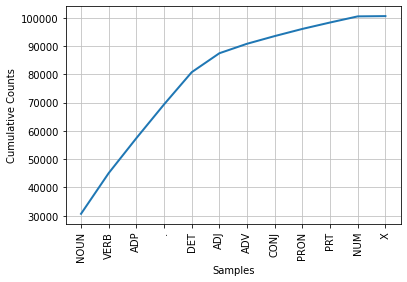

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [70]:
tag_fd.plot(cumulative=True)

Размеченные корпусы позволяют исследовать структуру предложений, например:

In [71]:

for word, tag in brown_news_tagged:
    print(word, tag, sep='\t')
    if tag == '.':
        break

The	DET
Fulton	NOUN
County	NOUN
Grand	ADJ
Jury	NOUN
said	VERB
Friday	NOUN
an	DET
investigation	NOUN
of	ADP
Atlanta's	NOUN
recent	ADJ
primary	NOUN
election	NOUN
produced	VERB
``	.


### Автоматическая разметка

Рассмотрим методы автоматической разметки частей речи, используя тестовый и тренировочный корпусы из `brown`:

In [72]:
brown_tagged_sents = nltk.corpus.brown.tagged_sents(categories='news')
brown_sents = nltk.corpus.brown.sents(categories='news')

#### Разметка значениями по умолчанию

Простейший способ разметки — присвоение одной и той же метки всем словам.
 Данный метод может использоваться для получения точности необученной модели и оценки качества её обучения.

In [73]:
tagger = nltk.DefaultTagger('VB')
tagger.tag(brown_sents[0])

[('The', 'VB'),
 ('Fulton', 'VB'),
 ('County', 'VB'),
 ('Grand', 'VB'),
 ('Jury', 'VB'),
 ('said', 'VB'),
 ('Friday', 'VB'),
 ('an', 'VB'),
 ('investigation', 'VB'),
 ('of', 'VB'),
 ("Atlanta's", 'VB'),
 ('recent', 'VB'),
 ('primary', 'VB'),
 ('election', 'VB'),
 ('produced', 'VB'),
 ('``', 'VB'),
 ('no', 'VB'),
 ('evidence', 'VB'),
 ("''", 'VB'),
 ('that', 'VB'),
 ('any', 'VB'),
 ('irregularities', 'VB'),
 ('took', 'VB'),
 ('place', 'VB'),
 ('.', 'VB')]

In [74]:
tagger.evaluate(brown_tagged_sents)

0.024265568749129822

Точность теггера по умолчанию всего 2%, что позволяет сделать вывод о тои, что 2% всех токенов текста являются глаголами.

#### Разметка с помощью регулярных выражений

Для некоторых, особенно агглютинативных, языков, часть речи можно определить по окончанию с помощью регулярных выражений практически со 100% точностью. Примеры таких языков: тюркские, некоторые финно-угорские языки, японский, грузинский, баскский. Для синтетических языков данный метод также применим, но точность будет ниже.
В аналитических языках (английский, французский) часть речи редко зависит от формы слова, следовательно точность разметки будет ниже.

##### Примеры:

Английский:

In [75]:
patterns_en = [
    (r'.*ing$', 'VBG'),  # gerunds
    (r'.*ly$', 'ADV'),  # adverbs
    (r'.*ed$', 'VBD'),  # simple past
    (r'.*es$', 'VBZ'),  # 3rd singular present
    (r'.*ould$', 'MD'),  # modals
    (r'.*\'s$', 'NN$'),  # possessive nouns
    (r'.*s$', 'NNS'),  # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')  # nouns (default)
]

regexp_tagger_en = nltk.RegexpTagger(patterns_en)
regexp_tagger_en.evaluate(brown_tagged_sents)

0.20116554289237623

эсперанто

In [76]:
patterns_eo = [
    (r'.*o$', 'NOUN'),
    (r'kaj', 'CONJ'),
    (r'la', 'ART.DEF'),
    (r'.*on$', 'NOUN.acc'),
    (r'.*aj?$', 'ADJ'),
    (r'.*aj?n$', 'ADJ.acc'),
    (r'(de|laŭ)$', 'PREP'),
    (r'(Ĝ|M|N)i$', 'PN'),
    (r'.*e$', 'ADV'),
    (r'.*as$', 'V.PRS'),
    (r'.*i$', 'V'),
    (r'.*is$', 'V.PST'),
    (r'.*os$', 'V.FUT'),
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', '.')  # nouns (default)
]

'''
Esperanta Vikipedio estas projekto de kunlabora enciklopedio, universala kaj plurlingva, kreita interrete laŭ la vikio-principo. Ĝi celas liveri en Esperanto liberan, objektivan kaj kontroleblan enhavon, kiun ĉiuj povas redakti.
'''

regexp_tagger_eo = nltk.RegexpTagger(patterns_eo)
regexp_tagger_eo.evaluate([[('Esperanta', 'ADJ'),
                            ('Vikipedio', 'NOUN'),
                            ('estas', 'V.PRS'),
                            ('projekto', 'NOUN'),
                            ('de', 'PREP'),
                            ('kunlabora', 'ADJ'),
                            ('enciklopedio', 'NOUN'),
                            (',', '.'),
                            ('universala', 'ADJ'),
                            ('kaj', 'CONJ'),
                            ('plurlingva', 'ADJ'),
                            (',', '.'),
                            ('kreita', 'ADJ'),
                            ('interrete', 'ADV'),
                            ('laŭ', 'PREP'),
                            ('la', 'ART.DEF'),
                            ('vikio-principo', 'NOUN'),
                            ],
                           [
                               ('Ĝi', 'PN'),
                               ('celas', 'V.PRS'),
                               ('liveri', 'V'),
                               ('en', 'PREP'),
                               ('Esperanto', 'NOUN'),
                               ('liberan', 'ADJ.acc'),
                               (',', '.'),
                               ('objektivan', 'ADJ.acc'),
                               ('kaj', 'CONJ'),
                               ('kontroleblan', 'ADJ.acc'),
                               ('enhavon', 'NOUN.acc'),
                               (',', '.'),
                               ('kiun', 'CONJ.acc'),
                               ('ĉiuj', 'DET'),
                               ('povas', 'V.PRS'),
                               ('redakti', 'V'),
                               ('.', '.')]])

0.8823529411764706

Получаем точность 0,88 для агглютинативного языка, при этом использовались простые правила для каждой метки.
Но для аналитического языка разметка на основе окончаний даёт точность всего 0,2.

### Lookup tagger

Lookup tagger, или Unigram Tagger, запоминает метку каждой словоформы из обучающего набора и на тестовом примере подставляет метку тем словоформам,  которые уже видел.

Аналогично данный метод хорошо подходит для агглютинативных языков, где метка однозначно выводится из слова, должен хорошо работать с синтетическими языками, где, обычно, часть речи ясна по форме слова, и не подходит для аналитических языков, так как в них часть речи зависит от контекста слова.

Также данному методу требуется больший объём данных для обучения.

Пример для английского языка:

In [77]:
fd = nltk.FreqDist(nltk.corpus.brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(nltk.corpus.brown.tagged_words(categories='news'))

most_freq_words = fd.most_common(100)
likely_tags = {word: cfd[word].max() for (word, _) in most_freq_words}

unigram_tagger = nltk.UnigramTagger(model=likely_tags)
unigram_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

### Разметка с помощью N-грам

Разделиим корпус на тренировочную и тестовую выборки:

In [78]:
size = int(len(brown_tagged_sents)*0.7)
train_sents=brown_tagged_sents[:size]
test_sents=brown_tagged_sents[size:]

#### Unigram Tagging

Unigram-тэггеры основаны на статистическом алгориитме: для каждого токена считается, с какой меткой он встречается чаще всего, и эта метка ставится всем таким словам в тексте.
Отличием данного метода от Lookup tagging заключается в подготовительной стадии, на которой каждому токену присваивается наиболее вероятная метка.

In [79]:
unigram_tagger = nltk.UnigramTagger(train_sents)
print("train:",unigram_tagger.evaluate(train_sents))
print("test:",unigram_tagger.evaluate(test_sents))

train: 0.9357742402315484
test: 0.7986265657785974


#### N-gram tagger

N-gram теггеры работают также, как и Unigram, но сопоставляют метку не с одним словом, а с сочетанием текущего и нескольких предыдущих слов.

![p](https://www.nltk.org/images/tag-context.png)

In [80]:
for i in range(1,5):
    tagger = nltk.NgramTagger(i, train_sents)
    print(f"{i}-gram tagger accuracy train: {tagger.evaluate(train_sents)}")
    print(f"{i}-gram tagger accuracy test: {tagger.evaluate(test_sents)}")

1-gram tagger accuracy train: 0.9357742402315484
1-gram tagger accuracy test: 0.7986265657785974
2-gram tagger accuracy train: 0.8009985528219971
2-gram tagger accuracy test: 0.09032237553252369
3-gram tagger accuracy train: 0.832836468885673
3-gram tagger accuracy test: 0.056813123927004515
4-gram tagger accuracy train: 0.906671490593343
4-gram tagger accuracy test: 0.05172633051440199


Как видим, на тестовом наборе лучше всего работает теггер на основе биграм, при увеличении длины контекста повышается точность на тренировочных данных, но снижается на тестовых, то есть при использовании N-грам, N>2, модель переобучается.

### Комбинирование теггеров

В неокоторых случаях один теггер не может подобрать метку для какого-либо слова(например биграммный теггер не может подобрать метку для первого слова в предложении), в этом случае можно указать другой теггер, который будет помечать такие слова:

In [81]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8344248744197876

Обученные теггеры, также как и другие объекты python, могут быть сериализованы для повторного использования с помощью модуля `pickle`:

In [82]:
import pickle

with open('t2.pkl', 'wb') as f:
    pickle.dump(t2, f)

Использование предобученной модели:

In [83]:
inp = open('t2.pkl','rb')
bigram_tagger: nltk.tag.sequential.BigramTagger = pickle.load(inp)
inp.close()

bigram_tagger.tag(["The", "human", "goes", "to", "work"])

[('The', 'AT'), ('human', 'NN'), ('goes', 'VBZ'), ('to', 'TO'), ('work', 'VB')]

Ещё один метод разметки основан на использовании грамматик, например если один теггер вывел последовательность `TO NN NNS`, то применяется правило преобразования в `TO VB NNS` по правилам английского языка, то есть использууется контекстно-зависимая грамматика:

In [84]:
from nltk.tbl import demo as tbl_demo
tbl_demo.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8366
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  

## Извлечение информации из текста

В тексте информация представляется разными способами и для её извлечения применяются методы обработки естественного языка.

В случае, если данные представлены в таблице, например `csv`-файл:

```csv
Org,Location
Omnicom,New York
DDB Needham,New York
Kaplan Thaler Group,New York
BBDO South,Atlanta
Georgia-Pacific,Atlanta
```

то для получения компаний из Атланты достаточно выполнить запрос pangas:

In [5]:
import pandas as pd

In [86]:
df = pd.read_csv(io.StringIO("""Org,Location
Omnicom,New York
DDB Needham,New York
Kaplan Thaler Group,New York
BBDO South,Atlanta
Georgia-Pacific,Atlanta"""))

df[df["Location"]=="Atlanta"]["Org"]

3         BBDO South
4    Georgia-Pacific
Name: Org, dtype: object

но классические методы не работают, если информация будет представлена в виде текста на естественном языке, например:

In [87]:
ieer = nltk.corpus.ieer
rt = ieer.raw('NYT_19980315')
bs = BeautifulSoup(rt, 'lxml')

In [88]:
body = bs.contents[0].contents[0].contents[0].contents[21].contents[9].contents[1].text[5745:6264]
print(body)

The fourth Wells account moving to another agency is the
packaged paper-products division of Georgia-Pacific Corp., which
arrived at Wells only last fall. Like Hertz and the History
Channel, it is also leaving for an Omnicom-owned agency, the BBDO
South unit of BBDO Worldwide.
	   BBDO South in Atlanta, which handles corporate advertising for
Georgia-Pacific, will assume additional duties for brands like
Angel Soft toilet tissue and Sparkle paper towels, said Ken Haldin,
a spokesman for Georgia-Pacific in Atlanta.


В этом тексте содержится та же информация, что и в csv файле, но извлечь её автоматически с использованием классических алгоритмов невозможно.

Для извлечения информации разобьём текст на предложения, токены и присвоим каждому токену метку части речи:

In [89]:
def parse(text: str, language: str = "english") ->list[tuple[str, str]]:
    assert language in {"english"}
    sents = nltk.sent_tokenize(text, language)
    sents = [nltk.word_tokenize(sent, language) for sent in sents]
    sents = [nltk.pos_tag(sent, lang="eng" if language is "english" else "") for sent in sents]
    return sents

<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_14452/120868889.py:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
  sents = [nltk.pos_tag(sent, lang="eng" if language is "english" else "") for sent in sents]


In [90]:
tokens = parse(body)
tokens

[[('The', 'DT'),
  ('fourth', 'JJ'),
  ('Wells', 'NNP'),
  ('account', 'NN'),
  ('moving', 'VBG'),
  ('to', 'TO'),
  ('another', 'DT'),
  ('agency', 'NN'),
  ('is', 'VBZ'),
  ('the', 'DT'),
  ('packaged', 'VBN'),
  ('paper-products', 'NNS'),
  ('division', 'NN'),
  ('of', 'IN'),
  ('Georgia-Pacific', 'NNP'),
  ('Corp.', 'NNP'),
  (',', ','),
  ('which', 'WDT'),
  ('arrived', 'VBD'),
  ('at', 'IN'),
  ('Wells', 'NNP'),
  ('only', 'RB'),
  ('last', 'JJ'),
  ('fall', 'NN'),
  ('.', '.')],
 [('Like', 'IN'),
  ('Hertz', 'NNP'),
  ('and', 'CC'),
  ('the', 'DT'),
  ('History', 'NNP'),
  ('Channel', 'NNP'),
  (',', ','),
  ('it', 'PRP'),
  ('is', 'VBZ'),
  ('also', 'RB'),
  ('leaving', 'VBG'),
  ('for', 'IN'),
  ('an', 'DT'),
  ('Omnicom-owned', 'JJ'),
  ('agency', 'NN'),
  (',', ','),
  ('the', 'DT'),
  ('BBDO', 'NNP'),
  ('South', 'NNP'),
  ('unit', 'NN'),
  ('of', 'IN'),
  ('BBDO', 'NNP'),
  ('Worldwide', 'NNP'),
  ('.', '.')],
 [('BBDO', 'NNP'),
  ('South', 'NNP'),
  ('in', 'IN'),
  ('Atla

Далее, для выполнения поиска по тексту, необходимо построить синтаксическое дерево в соответствии с некоторой грамматикой:

In [91]:
grammar = '''
NP: {<DT>?<JJ>*<NN>}
'''
parser = nltk.RegexpParser(grammar)
result = parser.parse(tokens[0])
result.draw() # открывает новое окно

### Определение и оценка блоков

В корпусе с размеченными синтаксическими деревьями `nltk.corpus.conll для описания структуры синтаксического дерева используется нотация IOB [2]:

(S
  (NP This/DT)
  (VP compares/VBZ)
  (PP with/IN)
  (NP a/DT 1.6/CD %/NN rise/NN)
  (PP in/IN)
  (NP the/DT second/NN)
  (PP from/IN)
  (NP the/DT first/JJ quarter/NN)
  and/CC
  (NP a/DT 5.4/CD %/NN increase/NN)
  (PP from/IN)
  (NP the/DT second/JJ quarter/NN)
  (PP of/IN)
  (NP 1988/CD)
  ./.)


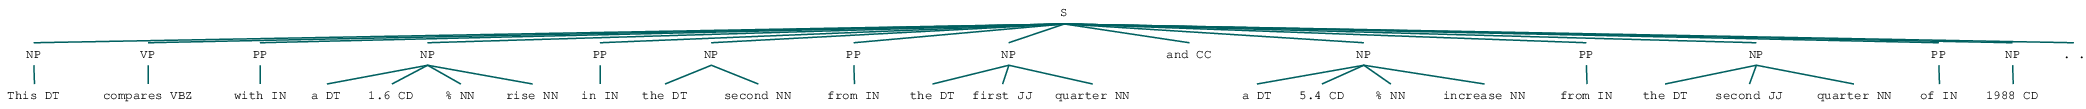

In [92]:
conll2000: nltk.corpus.util.LazyCorpusLoader = nltk.corpus.conll2000
print(conll2000.chunked_sents('train.txt')[20])
conll2000.chunked_sents('train.txt')[20]

CoNLL 2000 группирует словосочетания по следующим категориям:
    именные сочетания,
    глагольные сочетания и
    причастные обороты.
Для решения поставленной выше задачи излечения местоположения компании из текста

In [94]:
print(body)

The fourth Wells account moving to another agency is the
packaged paper-products division of Georgia-Pacific Corp., which
arrived at Wells only last fall. Like Hertz and the History
Channel, it is also leaving for an Omnicom-owned agency, the BBDO
South unit of BBDO Worldwide.
	   BBDO South in Atlanta, which handles corporate advertising for
Georgia-Pacific, will assume additional duties for brands like
Angel Soft toilet tissue and Sparkle paper towels, said Ken Haldin,
a spokesman for Georgia-Pacific in Atlanta.


Основной интерес представляют именные словосочетания, для их фильтрации можно использовать

(S
  (NP This/DT)
  compares/VBZ
  with/IN
  (NP a/DT 1.6/CD %/NN rise/NN)
  in/IN
  (NP the/DT second/NN)
  from/IN
  (NP the/DT first/JJ quarter/NN)
  and/CC
  (NP a/DT 5.4/CD %/NN increase/NN)
  from/IN
  (NP the/DT second/JJ quarter/NN)
  of/IN
  (NP 1988/CD)
  ./.)


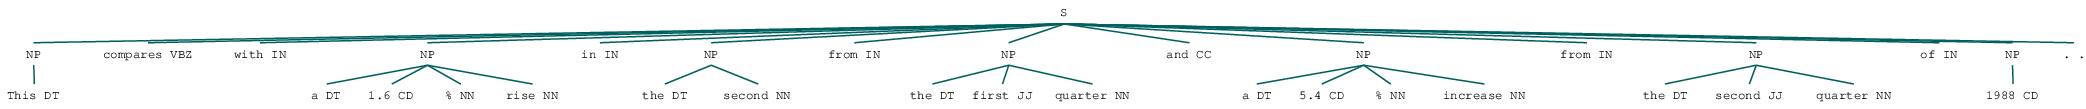

In [96]:
print(conll2000.chunked_sents('train.txt', chunk_types=['NP'])[20])
conll2000.chunked_sents('train.txt', chunk_types=['NP'])[20]

#### обучение chunker'ов

Перед тем, как обучать chunker'ы, посмотрим точность тривиального парсера, не создающего сегментов:

In [101]:
cp = nltk.RegexpParser("")
test_sents =conll2000.chunked_sents('test.txt', chunk_types=['NP'])
train_sents =conll2000.chunked_sents('train.txt', chunk_types=['NP'])
print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  43.4%%
    Precision:      0.0%%
    Recall:         0.0%%
    F-Measure:      0.0%%


Если предположить, что именные словосочетания начинаются с артикля, числительного или прилагательного (DT,  JJ, CD):

In [100]:
grammar = r"NP: {<[CDJNP].*>+}"
cp = nltk.RegexpParser(grammar)
print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  87.4%%
    Precision:     69.7%%
    Recall:        67.5%%
    F-Measure:     68.6%%


Если использовать разметку на основе N-грам:

In [116]:
class NgramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents: nltk.collections.LazyMap, n: int):
        train_data = [
            [
                (t, c) for _, t, c in nltk.chunk.tree2conlltags(sent)
            ]
            for sent in train_sents
        ]
        self.tagger = nltk.NgramTagger(n, train_data)

    def parse(self, tokens):
        pos_tags = [pos for (_, pos) in tokens]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunk_tags = [t for (_, t) in tagged_pos_tags]
        conll_tags = [(w, p, t) for ((w, p), t) in zip(tokens, chunk_tags)]
        return nltk.chunk.conlltags2tree(conll_tags)

In [146]:
for n in range(1,5):
    print(f"{n}-gram chunker result:")
    print(NgramChunker(train_sents, n).evaluate(test_sents))

1-gram chunker result:
ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%
2-gram chunker result:
ChunkParse score:
    IOB Accuracy:  93.3%%
    Precision:     82.3%%
    Recall:        86.8%%
    F-Measure:     84.5%%
3-gram chunker result:
ChunkParse score:
    IOB Accuracy:  93.3%%
    Precision:     82.5%%
    Recall:        86.8%%
    F-Measure:     84.6%%
4-gram chunker result:
ChunkParse score:
    IOB Accuracy:  93.0%%
    Precision:     82.5%%
    Recall:        86.7%%
    F-Measure:     84.5%%


Наилучшие результаты у chunk'ера на основе биграм.

### Рекурсия в языкоых структурах

В предложениях на естественных языках часто встречаются рекурсивные структуры, например сложносочинённые предложения состоят из нескольких предложений, которые тоже могут быть сложными.

Возьмём, например, простую грамматику:

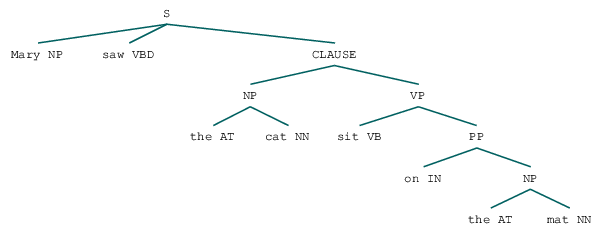

In [151]:
 grammar = r"""
 NP: {<(A|D)T|JJ|NN.*>+}
 PP: {<IN><NP>}
 VP: {<VB.*><NP|PP|CLAUSE>+$}
 CLAUSE: {<NP><VP>}
 """

cp = nltk.RegexpParser(grammar)

sentence = t2.tag(nltk.word_tokenize("Mary saw the cat sit on the mat"))
cp.parse(sentence)

Дерево построено верно, но для более сложной структуры:

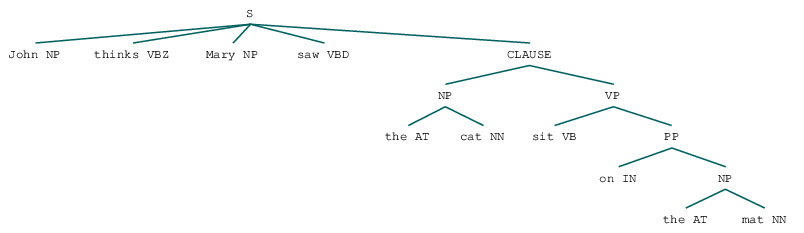

In [152]:
sentence = t2.tag(nltk.word_tokenize("John thinks Mary saw the cat sit on the mat"))
cp.parse(sentence)

не учитывается придаточное первого уровня.
Для исправления увеличим глубину рекурсивного разбора:

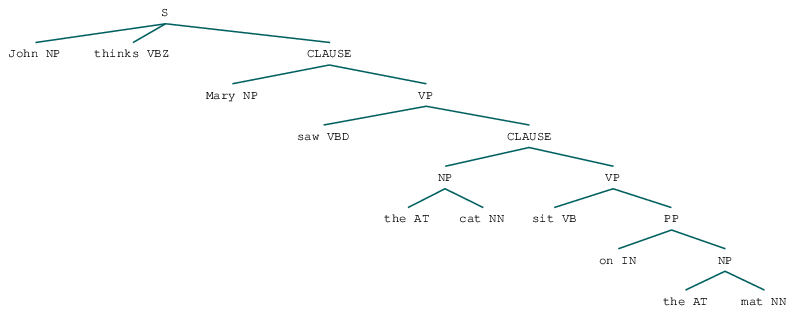

In [154]:
cp2 = nltk.RegexpParser(grammar, loop=2)
cp2.parse(sentence)

получаем верное дерево разбора.

### Распознавание именнованных сущностей

Для распознавания именованных сущностей в  NLTK встроен метод `nltk.ne_chunk`:

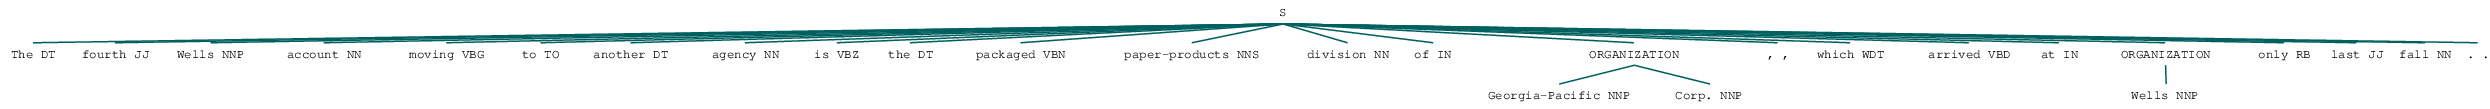

In [171]:
tokens = [nltk.word_tokenize(i) for i in nltk.sent_tokenize(body)]

tagged_sents = nltk.pos_tag_sents(tokens)

In [175]:
ne_chunked = []
for i in tagged_sents:
    ne_chunked.append(nltk.ne_chunk(i))
    print(ne_chunked[-1])

(S
  The/DT
  fourth/JJ
  Wells/NNP
  account/NN
  moving/VBG
  to/TO
  another/DT
  agency/NN
  is/VBZ
  the/DT
  packaged/VBN
  paper-products/NNS
  division/NN
  of/IN
  (ORGANIZATION Georgia-Pacific/NNP Corp./NNP)
  ,/,
  which/WDT
  arrived/VBD
  at/IN
  (ORGANIZATION Wells/NNP)
  only/RB
  last/JJ
  fall/NN
  ./.)
(S
  Like/IN
  (PERSON Hertz/NNP)
  and/CC
  the/DT
  (ORGANIZATION History/NNP Channel/NNP)
  ,/,
  it/PRP
  is/VBZ
  also/RB
  leaving/VBG
  for/IN
  an/DT
  Omnicom-owned/JJ
  agency/NN
  ,/,
  the/DT
  (ORGANIZATION BBDO/NNP South/NNP)
  unit/NN
  of/IN
  (ORGANIZATION BBDO/NNP Worldwide/NNP)
  ./.)
(S
  (ORGANIZATION BBDO/NNP South/NNP)
  in/IN
  (GPE Atlanta/NNP)
  ,/,
  which/WDT
  handles/VBZ
  corporate/JJ
  advertising/NN
  for/IN
  Georgia-Pacific/NNP
  ,/,
  will/MD
  assume/VB
  additional/JJ
  duties/NNS
  for/IN
  brands/NNS
  like/IN
  (PERSON Angel/NNP Soft/NNP)
  toilet/NN
  tissue/NN
  and/CC
  (GPE Sparkle/NNP)
  paper/NN
  towels/NNS
  ,/,
  said/VB

Теперь мы можем извлечь отношения сущностей, например отношения ORG in LOC:

Пример на размеченных данных:

In [178]:
IN = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    for rel in nltk.sem.extract_rels('ORG', 'LOC', doc, 'ieer', IN):
        print(nltk.sem.rtuple(rel))

[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']
[ORG: 'McGlashan &AMP; Sarrail'] 'firm in' [LOC: 'San Mateo']
[ORG: 'Freedom Forum'] 'in' [LOC: 'Arlington']
[ORG: 'Brookings Institution'] ', the research group in' [LOC: 'Washington']
[ORG: 'Idealab'] ', a self-described business incubator based in' [LOC: 'Los Angeles']
[ORG: 'Open Text'] ', based in' [LOC: 'Waterloo']
[ORG: 'WGBH'] 'in' [LOC: 'Boston']
[ORG: 'Bastille Opera'] 'in' [LOC: 'Paris']
[ORG: 'Omnicom'] 'in' [LOC: 'New York']
[ORG: 'DDB Needham'] 'in' [LOC: 'New York']
[ORG: 'Kaplan Thaler Group'] 'in' [LOC: 'New York']
[ORG: 'BBDO South'] 'in' [LOC: 'Atlanta']
[ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta']


## Анализ структуры предложений

Контекстно свободая грамматика может быть неоднозначой, например:

In [30]:
sent = nltk.word_tokenize("While hunting in Africa I shot an elephant in my pajamas")

In [50]:
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [51]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)#%% md
for tree in parser.parse(sent):
    print(tree)## Список литературы

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


Получаем два корректных дерева разбора.

### Грамматики зависимостей

В предложении все слова связаны друг с другом отношениями, запишем граммитику зависимостей для предложения выше:

In [53]:
groucho_dep_grammar = nltk.DependencyGrammar.fromstring('''
'shot' -> 'I' | 'elephant' | 'in'
'elephant' -> 'an' | 'in'
'in' -> 'pajamas'
'pajamas' -> 'my'
''')
print(groucho_dep_grammar)

Dependency grammar with 7 productions
  'shot' -> 'I'
  'shot' -> 'elephant'
  'shot' -> 'in'
  'elephant' -> 'an'
  'elephant' -> 'in'
  'in' -> 'pajamas'
  'pajamas' -> 'my'


построим дерево разбора:

In [54]:
pdp = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
trees = pdp.parse(sent)
for tree in trees:
    print(tree)

(shot I (elephant an (in (pajamas my))))
(shot I (elephant an) (in (pajamas my)))


## Анализ значений предложений

### Понимание естественного чзыка

Допустим. что у нас есть таблица в базе данных, состоящая из полей
"город",
"страна" и
"численность населения".
И нам нужно выдавать ответы на запросы, описанные естественным языком, например: "Which country is Moscow in?".

В NLTK включён парсер для конвертации естественного языка в SQL:

In [5]:
nltk.data.show_cfg("grammars/book_grammars/sql0.fcfg")

% start S
S[SEM=(?np + WHERE + ?vp)] -> NP[SEM=?np] VP[SEM=?vp]
VP[SEM=(?v + ?pp)] -> IV[SEM=?v] PP[SEM=?pp]
VP[SEM=(?v + ?ap)] -> IV[SEM=?v] AP[SEM=?ap]
NP[SEM=(?det + ?n)] -> Det[SEM=?det] N[SEM=?n]
PP[SEM=(?p + ?np)] -> P[SEM=?p] NP[SEM=?np]
AP[SEM=?pp] -> A[SEM=?a] PP[SEM=?pp]
NP[SEM='Country="greece"'] -> 'Greece'
NP[SEM='Country="china"'] -> 'China'
Det[SEM='SELECT'] -> 'Which' | 'What'
N[SEM='City FROM city_table'] -> 'cities'
IV[SEM=''] -> 'are'
A[SEM=''] -> 'located'
P[SEM=''] -> 'in'


Транслируем по этой грамматике предложение в SQL-запрос:

In [37]:
cp = nltk.load_parser("grammars/book_grammars/sql0.fcfg")
query = "What cities are located in China"
trees = list(cp.parse(nltk.word_tokenize(query)))
print("Trees found:", len(trees))
answer = trees[0]
print(answer)

Trees found: 1
(S[SEM=(SELECT, City FROM city_table, WHERE, , , Country="china")]
  (NP[SEM=(SELECT, City FROM city_table)]
    (Det[SEM='SELECT'] What)
    (N[SEM='City FROM city_table'] cities))
  (VP[SEM=(, , Country="china")]
    (IV[SEM=''] are)
    (AP[SEM=(, Country="china")]
      (A[SEM=''] located)
      (PP[SEM=(, Country="china")]
        (P[SEM=''] in)
        (NP[SEM='Country="china"'] China)))))


Для каждого узла дерева разбора установлено свойство, отраэжающее соответствующую часть SQL запроса, значит полный запрос содержится в корне дерева:

In [39]:
q = ' '.join(s for s in answer.label()['SEM'] if s)
q

'SELECT City FROM city_table WHERE Country="china"'

Сгенерирован валидный SQL-запрос, который можно направить в базу данных

Такая генерация возможно благодаря трансформации деревьев синтаксического разбора предложений стандартными етодами, применяемыми в обычных трансляторах для языков программирования.

## Список литературы

1. Bird S., Klein E., Loper E. Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit. URL: http://www.nltk.org/book/.
2. Inside–outside–beginning (tagging) // Wikipedia. 2021.